# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Project-4:-Exploring-the-UK's-milk-imports-and-exports" data-toc-modified-id="Project-4:-Exploring-the-UK's-milk-imports-and-exports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 4: Exploring the UK's milk imports and exports</a></div><div class="lev1 toc-item"><a href="#Env" data-toc-modified-id="Env-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Env</a></div><div class="lev1 toc-item"><a href="#Getting-and-preparing-the-data" data-toc-modified-id="Getting-and-preparing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting and preparing the data</a></div><div class="lev1 toc-item"><a href="#Total-trade-flow" data-toc-modified-id="Total-trade-flow-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Total trade flow</a></div><div class="lev1 toc-item"><a href="#Main-trade-partners" data-toc-modified-id="Main-trade-partners-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Main trade partners</a></div><div class="lev1 toc-item"><a href="#Regular-importers" data-toc-modified-id="Regular-importers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regular importers</a></div><div class="lev1 toc-item"><a href="#Bi-directional-trade" data-toc-modified-id="Bi-directional-trade-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bi-directional trade</a></div><div class="lev1 toc-item"><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></div>

## Project 4: Exploring the UK's milk imports and exports

by Tony Hirst and Michel Wermelinger, 19 November 2015 and 28 March 2016

This is the project notebook for Week 4 of The Open University's [_Learn to Code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of milk and cream in 2015:

- How much does the UK export and import and is the balance positive (more exports than imports)? 
- Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
- Which are the regular customers, i.e. which countries buy milk from the UK every month?
- Which countries does the UK both import from and export to?

## Env

In [1]:
import sys
sys.version

'3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline
show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.1.final.0
python-bits: 64
OS: Windows
OS-release: 7
machine: AMD64
processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.1
pytest: 3.0.7
pip: 9.0.1
setuptools: 27.2.0
Cython: 0.25.2
numpy: 1.12.1
scipy: 0.19.0
xarray: None
IPython: 5.3.0
sphinx: 1.5.6
patsy: 0.4.1
dateutil: 2.6.0
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.2.2
numexpr: 2.6.2
feather: None
matplotlib: 2.0.2
openpyxl: 2.4.7
xlrd: 1.0.0
xlwt: 1.2.0
xlsxwriter: 0.9.6
lxml: 3.7.3
bs4: 4.6.0
html5lib: 0.999
sqlalchemy: 1.1.9
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: 0.4.0


## Getting and preparing the data

The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following configuration:

- Type of Product: goods
- Frequency: monthly 
- Periods: January to May of 2015
- Reporter: United Kingdom
- Partners: all
- Flows: imports and exports
- HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)

Clicking on 'Preview' results in a message that the data exceeds 500 rows. Data was downloaded using the *Download CSV* button and the download file renamed appropriately.

In [3]:
LOCATION = 'comtrade_milk_uk_jan_jul_15.csv'

The data can also be downloaded directly from Comtrade using the "View API Call" URL, modified in two ways:

- `max=500` is increased to `max=5000` to make sure all data is loaded,
- `&fmt=csv` is added at the end to obtain the data in CSV format.

In [4]:
# LOCATION = 'http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=201505%2C201504%2C201503%2C201502%2C201501&r=826&p=all&rg=1%2C2&cc=0401%2C0402&fmt=csv'

On reading in the data, the commodity code has to be read as a string, to not lose the leading zero.

In [5]:
milk = read_csv(LOCATION, dtype={'Commodity Code':str})
milk
milk.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
641,HS,2015,201505,May 2015,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,2213,NaN,37883,NaN,NaN,0
642,HS,2015,201505,May 2015,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,1588,NaN,5676,NaN,NaN,0


The data only covers the first five months of 2015. Most columns are irrelevant for this analysis, or contain always the same value, like the year and reporter columns. The commodity code is transformed into a short but descriptive text and only the relevant columns are selected.

In [6]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
milk[COMMODITY] = milk['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
milk = milk[headings]
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201501,World,Imports,unprocessed,14093902
1,201504,South Africa,Exports,unprocessed,8691
2,201504,Spain,Imports,unprocessed,25904
3,201504,Spain,Exports,unprocessed,199694
4,201504,Sweden,Imports,unprocessed,77072


The data contains the total imports and exports per month, under the 'World' partner. Those rows are removed to keep only the per-country data.

In [7]:
milk = milk[milk[PARTNER] != 'World']
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
1,201504,South Africa,Exports,unprocessed,8691
2,201504,Spain,Imports,unprocessed,25904
3,201504,Spain,Exports,unprocessed,199694
4,201504,Sweden,Imports,unprocessed,77072
5,201504,Sweden,Exports,unprocessed,4744


## Total trade flow

To answer the first question, 'how much does the UK export and import and is the balance positive (more exports than imports)?',
the dataframe is split into two groups: exports from the UK and imports into the UK. The  trade values within each group are summed up to get the total trading.

In [8]:
grouped = milk.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    267525521
Imports    160451147
Name: Trade Value (US$), dtype: int64

This shows a trade surplus of over 100 million dollars.

## Main trade partners

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [9]:
imports = milk[milk[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 22 countries.
The 5 biggest exporters to the UK are:


Partner
Ireland        47729692
France         28484766
Germany        22954774
Netherlands    18415687
Belgium        14303482
Name: Trade Value (US$), dtype: int64

The export values can be plotted as a bar chart, making differences between countries easier to see.

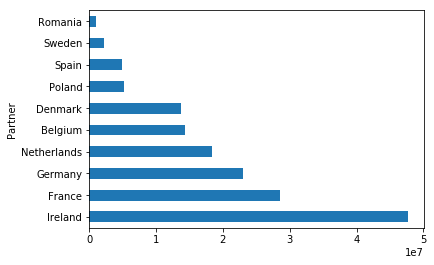

In [10]:
totalImports.head(10).plot(kind='barh');

In [11]:
exports = milk[milk[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).head()
# grouped[VALUE].aggregate(sum).order(ascending=False).head()

The UK exports to 107 countries.
The 5 biggest importers from the UK are:


Partner
Algeria                8087885
Angola                 2416129
Antigua and Barbuda      22218
Areas, nes               51205
Australia                81644
Name: Trade Value (US$), dtype: int64

## Regular importers

Given that there are two commodities, the third question, 'Which are the regular customers, i.e. which countries buy milk from the UK every month?', is meant in the sense that a regular customer imports both commodities every month. This means that if the exports dataframe is grouped by country, each group has exactly ten rows (two commodities bought each of the five months). To see the countries, only the first month of one commodity has to be listed, as by definition it's the same countries every month and for the other commodity.

In [12]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 201501) & (regular[COMMODITY] == 'processed')]

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
72,201501,Belgium,Exports,processed,142603
75,201501,China,Exports,processed,1013141
79,201501,Cyprus,Exports,processed,6601
84,201501,Denmark,Exports,processed,107883
88,201501,France,Exports,processed,178209
91,201501,Germany,Exports,processed,2588374
96,201501,"China, Hong Kong SAR",Exports,processed,1110086
297,201501,Hungary,Exports,processed,2119
301,201501,Ireland,Exports,processed,4020443
303,201501,Italy,Exports,processed,23256


Just over 75% of the total UK exports are due to these regular customers.

In [13]:
regular[VALUE].sum() / exports[VALUE].sum()

0.7606021669984898

## Bi-directional trade

To address the fourth question, 
'Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country. 

In [14]:
countries = pivot_table(milk, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Algeria,8087885.0,NaN
Angola,2416129.0,NaN
Antigua and Barbuda,22218.0,NaN
"Areas, nes",51205.0,NaN
Australia,81644.0,NaN


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with the UK.

In [15]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,56160.0,780.0
Belgium,7215960.0,14303482.0
Czech Rep.,2590.0,487196.0
Denmark,337622.0,13681571.0
France,9394028.0,28484766.0
Germany,11393222.0,22954774.0
Hungary,71331.0,4762.0
Ireland,128205584.0,47729692.0
Italy,173015.0,320150.0


## Conclusions

The milk and cream trade of the UK from January to May 2015 was analysed in terms of which countries the UK mostly depends on for income (exports) and goods (imports). Over the period, the UK had a trade surplus of over 100 million US dollars.

Ireland is the main partner, but it imported from the UK almost the triple in value than it exported to the UK. 

The UK exported to over 100 countries during the period, but only imported from 21 countries, the main ones (top five by trade value) being geographically close. China and Hong Kong are the main importers that are not also main exporters. 

The UK is heavily dependent on its regular customers, the 16 countries that buy all types of milk and cream every month. They contribute three quarters of the total export value.

The UK has bi-directional trade (i.e. both exports and imports) with 20 countries, although for some the trade value (in US dollars) is suspiciously low, which raises questions about the data's accuracy.